La base de datos world-data-2023.csv proporciona una gran cantidad de información sobre
todos los países del mundo, abarcando una amplia gama de indicadores y atributos. Incluye
estadísticas demográficas, indicadores económicos, factores ambientales, métricas de
atención médica, estadísticas educativas y mucho más. Con la representación de cada país,
este conjunto de datos ofrece una perspectiva global completa sobre diversos aspectos de
las naciones, lo que permite análisis en profundidad y comparaciones entre países. Las
variables consideradas son:
● 0. Country: Nombre del país.
● 1. Density (P/Km2): Densidad de población medida en personas por kilómetro
cuadrado.
● 2. Abbreviation: Abreviatura o código que representa el país.
● 3. Agricultural Land (%): Porcentaje del área de tierra utilizada para fines agrícolas.
● 4. Land Area (Km2): Área total de tierra del país en kilómetros cuadrados.
● 5. Armed Forces Size: Tamaño de las fuerzas armadas en el país.
● 6. Birth Rate: Número de nacimientos por 1,000 habitantes por año.
● 7. Calling Code: Código de llamada internacional para el país.
● 8. Capital/Major City: Nombre de la capital o ciudad principal.
● 9. CO2 Emissions: Emisiones de dióxido de carbono en toneladas.
● 10. CPI: Índice de Precios al Consumidor, una medida de la inflación y el poder
adquisitivo.
● 11. CPI Change (%): Cambio porcentual en el Índice de Precios al Consumidor en
comparación con el año anterior.
● 12. Currency_Code: Código de moneda utilizado en el país.
● 13. Fertility Rate: Número promedio de hijos nacidos de una mujer durante su vida.
● 14. Forested Area (%): Porcentaje del área de tierra cubierta por bosques.
● 15. Gasoline_Price: Precio de la gasolina por litro en moneda local.
● 16. GDP: Producto Interno Bruto, el valor total de bienes y servicios producidos en el
país.
● 17. Gross Primary Education Enrollment (%): Tasa de inscripción bruta en educación
primaria.
● 18. Gross Tertiary Education Enrollment (%): Tasa de inscripción bruta en educación
terciaria.
● 19. Infant Mortality: Número de muertes por cada 1,000 nacidos vivos antes de
cumplir un año de edad.
● 20. Largest City: Nombre de la ciudad más grande del país.
● 21. Life Expectancy: Número promedio de años que se espera que viva un recién
nacido.
● 22. Maternal Mortality Ratio: Número de muertes maternas por cada 100,000
nacidos vivos.
● 23. Minimum Wage: Nivel de salario mínimo en moneda local.
● 24. Official Language: Idioma(s) oficial(es) hablado(s) en el país.
● 25. Out of Pocket Health Expenditure (%): Porcentaje del gasto total en salud
pagado directamente por los individuos.
● 26. Physicians per Thousand: Número de médicos por cada mil personas.
● 27. Population: Población total del país.
● 28. Population: Labor Force Participation (%): Porcentaje de la población que forma
parte de la fuerza laboral.
● 29. Tax Revenue (%): Ingresos fiscales como porcentaje del PIB.
● 30. Total Tax Rate: Carga tributaria total como porcentaje de las ganancias
comerciales.
● 31. Unemployment Rate: Porcentaje de la fuerza laboral que está desempleada.
● 32. Urban Population: Porcentaje de la población que vive en áreas urbanas.
● 33. Latitude: Coordenada de latitud de la ubicación del país.
● 34. Longitude: Coordenada de longitud de la ubicación del país.

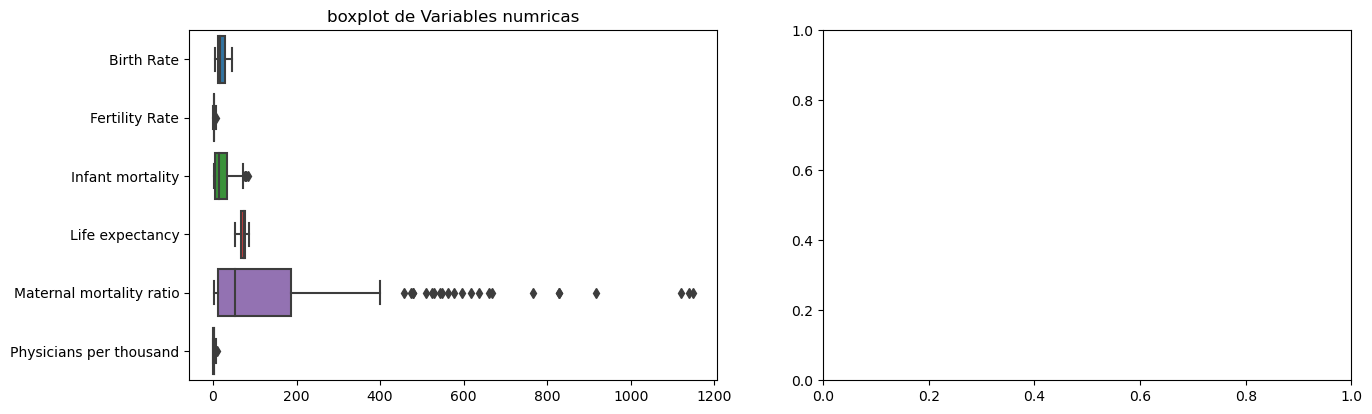

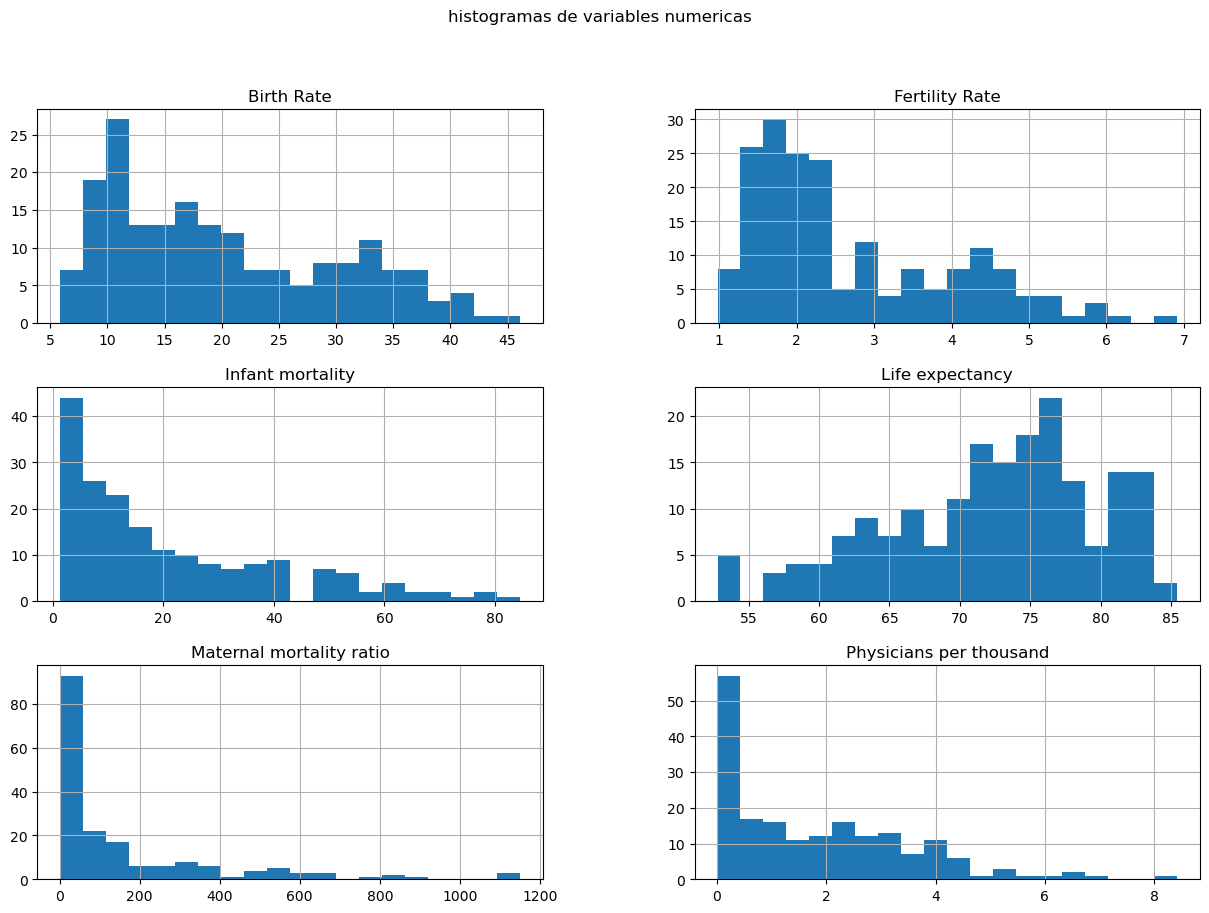

inspección inicial de los datos:
       Birth Rate  Fertility Rate  Infant mortality  Life expectancy  \
count  189.000000      188.000000        189.000000       187.000000   
mean    20.214974        2.698138         21.332804        72.279679   
std      9.945774        1.282267         19.548058         7.483661   
min      5.900000        0.980000          1.400000        52.800000   
25%     11.300000        1.705000          6.000000        67.000000   
50%     17.950000        2.245000         14.000000        73.200000   
75%     28.750000        3.597500         32.700000        77.500000   
max     46.080000        6.910000         84.500000        85.400000   

       Maternal mortality ratio  Physicians per thousand  
count                181.000000               188.000000  
mean                 160.392265                 1.839840  
std                  233.502024                 1.684261  
min                    2.000000                 0.010000  
25%                   1

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#cargamos los datos a un nuevo df
df = pd.read_csv('world-data-2023.csv')

#excluiremos las columnas solicitadas por el desafio
columns_to_exclude = ['Abbreviation', 'Calling Code', 'Capital/Major City', 'Currency-Code',
                      'Largest city', 'Official language', 'Latitude', 'Longitude']
df_cleaned = df.drop(columns=columns_to_exclude)

#realizamos una primera vista de los graficos
plt.figure(figsize=(15, 10))

#boxploteamos para variables numericas
plt.subplot(2, 2, 1)
sns.boxplot(data=df_cleaned, orient='h')
plt.title('boxplot de Variables numricas')

#histogramas para lo mismo
plt.subplot(2, 2, 2)
df_cleaned.hist(bins=20, figsize=(15, 10))
plt.suptitle('histogramas de variables numericas')
plt.show()

#inspeccionaos los datos iniciales
print("inspección inicial de los datos:")
print(df_cleaned.describe())


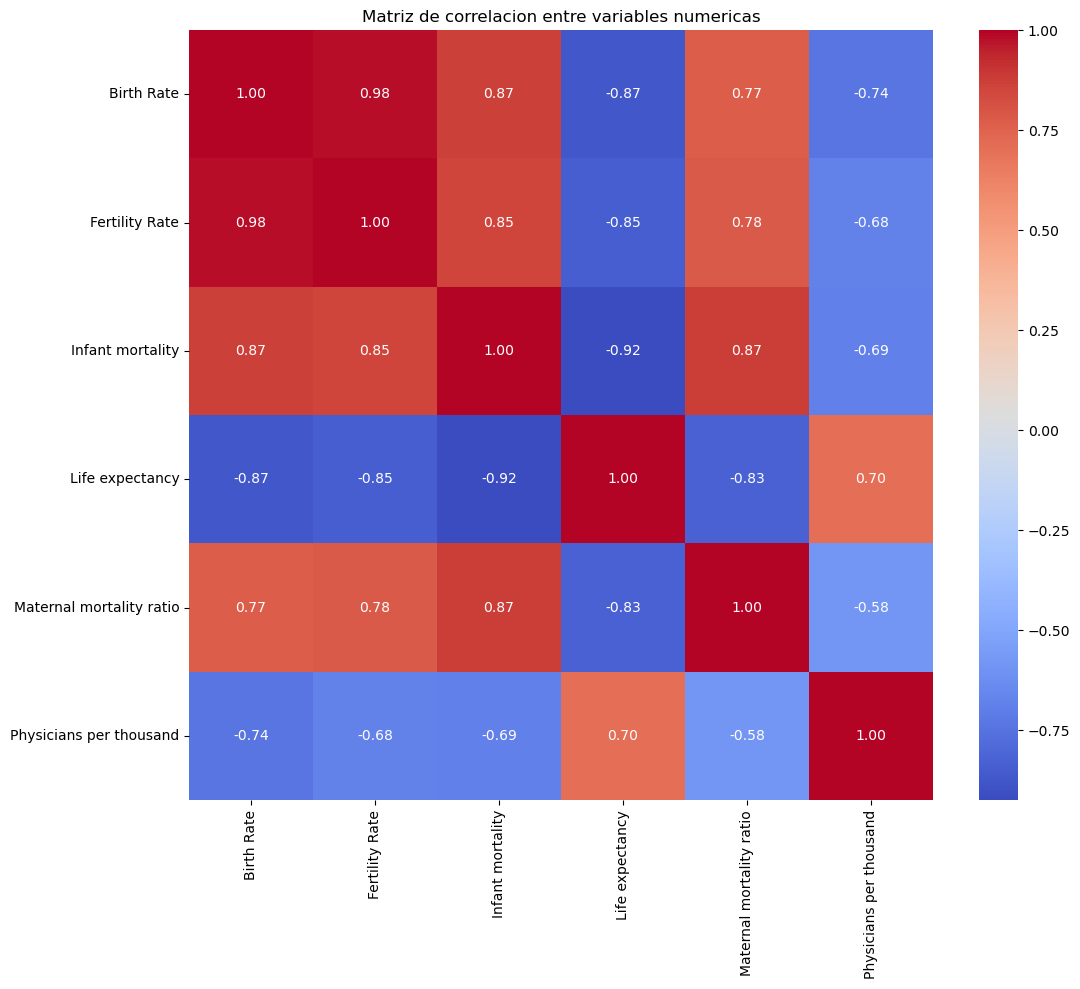

In [15]:
#seleccionamos solo las variables numericas
df_numeric = df_cleaned.select_dtypes(include=['float64', 'int64'])

#calculamos la matriz de corr.
correlation_matrix = df_numeric.corr()

# Visualizar matriz de correlación como un mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlacion entre variables numericas')
plt.show()


primero debemos identificarlos y luego decidir cómo manejarlos
identificamos los valores faltantes y atipicos en las dos variables del primer par
eliminamos los valores faltantes podemos optar por eliminar las filas que contengan valores faltantes en cualquiera de las dos variables, ya que no hay suficiente información para imputar valores perdidos como segun la guia nos pide en el data cleaning
tratar los valores atipicos podemos utilizar un metodo como el rango intercuartílico(segun la guia del desafio) para identificar y eliminar los valores atipicos en ambas variables esto implica calcular el rango intercuartílico de cada variable y eliminar cualquier valor que este fuera del rango (por ejemplo valores que estén por debajo del primer cuartil menos 1.5 veces el IQR o por encima del tercer cuartil mas 1.5 veces el IQR)

segundo identificar los valores faltantes y atppicos en las dos variables del segundo par
eliminar los valores faltantes de manera similar al primer par podemos optar por eliminar las filas que contengan valores faltantes en cualquiera de las dos variables.
tratar los valores atipicos al igual que en el primer par, podemos utilizar el metodo del rango intercuartílico IQR para identificar y eliminar los valores atipicos en ambas variables.
en mi github dejo los metodos de hacer data cleaning segun la guia proporcionada mas una investigacion para el analisis de datos

In [17]:
#primer par de vriables: 'Density (P/Km2)' y 'Population'
#identificamos y eliminanmos valores faltantes
df_cleaned_pair1 = df_cleaned[['Density (P/Km2)', 'Population']].dropna()

#convertimos a tipos de datos numericos
df_cleaned_pair1 = df_cleaned_pair1.apply(pd.to_numeric, errors='coerce')

#tratamos valotes atipicos para el rango IQR
Q1 = df_cleaned_pair1.quantile(0.25)
Q3 = df_cleaned_pair1.quantile(0.75)
IQR = Q3 - Q1
df_cleaned_pair1 = df_cleaned_pair1[~((df_cleaned_pair1 < (Q1 - 1.5 * IQR)) | (df_cleaned_pair1 > (Q3 + 1.5 * IQR))).any(axis=1)]

In [19]:
#mi segundo par de variables es gdp y co2
#idenfiticamos y elimintamos los valores faltantes
df_cleaned_pair2 = df_cleaned[['GDP', 'Co2-Emissions']].dropna()

#convertimos las columnas a datos numericos
df_cleaned_pair2 = df_cleaned_pair2.apply(pd.to_numeric, errors='coerce')

#tratamos los valores a rangos IQR
Q1 = df_cleaned_pair2.quantile(0.25)
Q3 = df_cleaned_pair2.quantile(0.75)
IQR = Q3 - Q1
df_cleaned_pair2 = df_cleaned_pair2[~((df_cleaned_pair2 < (Q1 - 1.5 * IQR)) | (df_cleaned_pair2 > (Q3 + 1.5 * IQR))).any(axis=1)]

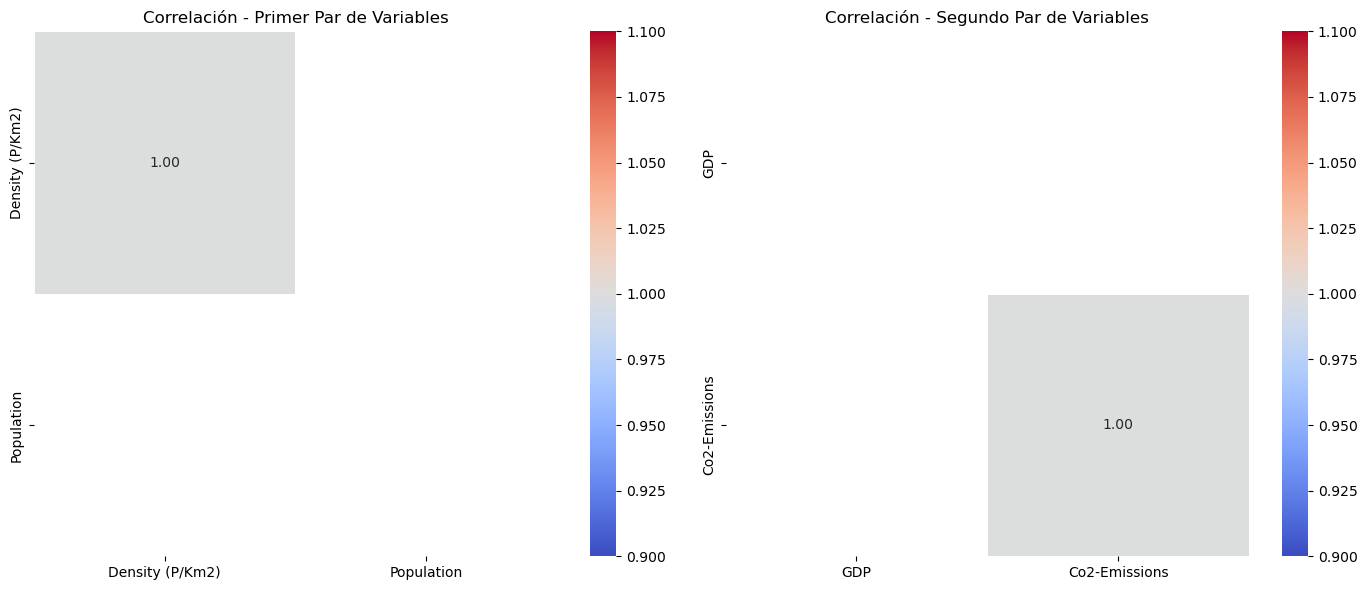

In [20]:
# Calcular matriz de correlación para el primer par de variables
correlation_matrix_pair1 = df_cleaned_pair1.corr()

# Calcular matriz de correlación para el segundo par de variables
correlation_matrix_pair2 = df_cleaned_pair2.corr()

# Crear subgráficos
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Mapa de calor para el primer par de variables
sns.heatmap(correlation_matrix_pair1, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=axs[0])
axs[0].set_title('correlacion - Primer par de variables')

# Mapa de calor para el segundo par de variables
sns.heatmap(correlation_matrix_pair2, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=axs[1])
axs[1].set_title('correlacion - Segundo Par de Variables')

plt.tight_layout()
plt.show()


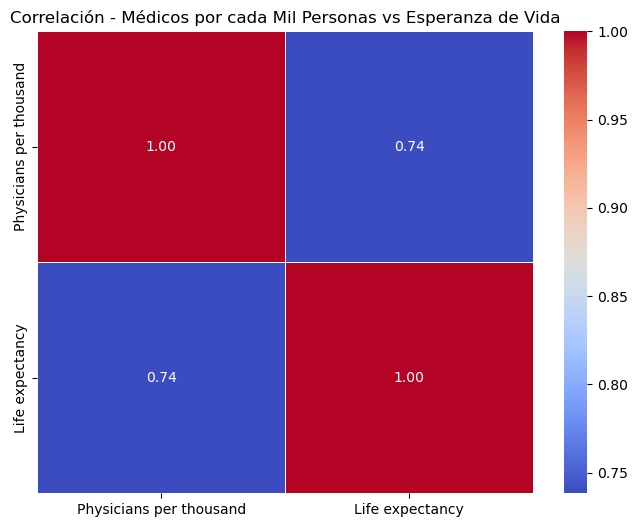

In [23]:
#seleccionamos las 2 variables solicitadas
df_medical_life = df_cleaned[['Physicians per thousand', 'Life expectancy']]

#hacemos limpieza de valores faltantes
df_medical_life = df_medical_life.dropna()

#convertivmos a valores numericos
df_medical_life = df_medical_life.apply(pd.to_numeric, errors='coerce')

#limpiamos los valores atipicos y usamos IQR
Q1 = df_medical_life.quantile(0.25)
Q3 = df_medical_life.quantile(0.75)
IQR = Q3 - Q1
df_medical_life = df_medical_life[~((df_medical_life < (Q1 - 1.5 * IQR)) | (df_medical_life > (Q3 + 1.5 * IQR))).any(axis=1)]

#calculamos la matrix de correlacion
correlation_matrix_medical_life = df_medical_life.corr()

#mapeamos los datos con el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_medical_life, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlación - Médicos por cada Mil Personas vs Esperanza de Vida')
plt.show()


In [4]:
#limpiamos y preparamos datos
#eliminamos filas con valores faltantes
df_cleaned = df[['Life Expectancy', 'Population']].dropna()

#convertimos la columna population a numerico
df_cleaned['Population'] = df_cleaned['Population'].str.replace(',', '').astype(int)

#ahora visualizaremos los datos
#relacionamos life expectancy con population
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Population', y='Life Expectancy', data=df_cleaned, alpha=0.6, color='blue')
plt.title('esperanza de vida vs poblacion')
plt.xlabel('poblacion total')
plt.ylabel('esperanza de Vida')
plt.grid(True)
plt.show()

# Análisis de correlación
correlation = df_cleaned['Population'].corr(df_cleaned['Life Expectancy'])
print("Coeficiente de correlación entre Life Expectancy y Population:", correlation)




NameError: name 'df' is not defined

In [ ]:
#nose que sucedio con el archivo pero no me esta leyendo el df